# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [46]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

print "Basic Dataset statistics"
print data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
Basic Dataset statistics
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

Based on a basic set of statistics, I would say that the first PCA dimensions will correspond to Fresh because it is the feature with the highest variance (in this case standard desviation).

In the case of ICA we are going to find independent vector represented by a combination of the initial features. I would expect the independent components to represent the buying patterns of different types of customers composed by their spending in different product categories. 

###PCA

In [47]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=len(data.transpose()))
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The first two principal components make for about the 85% of the variance (45% and 40% respectively) and then drops to about 7%.

Based on this, I would argue that we should choose two dimensions for PCA because they explain the vast majority of the variance.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

In the case we use two dimensions, I would argue that the first Principal Component represent mainly Fresh due to the magnitude of the Fresh component being  much higher than the rest. I would say that the second PC is a combination of Grocery, Milk and Detergents_Paper (in that order of importance) based on the magnitude of their components.

From searching the Discussion Board I found an implementation of a biplot (provided by other student) that confirmed my findings based on the magnitude / direction of each variable arrow.

High dimensionality datasets require significantly more computer power than low dimensionality datasets. Most Machine Learning algorithms will struggle with this (in supervised or unsupervised learning). One solution is to find a solution through a sample from the dataset and another solution is to lower the dimensionality of the data set. In this sense, PCA can be used to identify the most important dimensions (or create new ones) in order to lower the dimensionality of the data.

In this case, I would argue that using only 2 PCA dimensions to find customer segments would be enough to get a solution. This dimensions will probably represent Fresh and the combination of Grocery, Milk and Detergents_Paper.

(-0.25, 1)

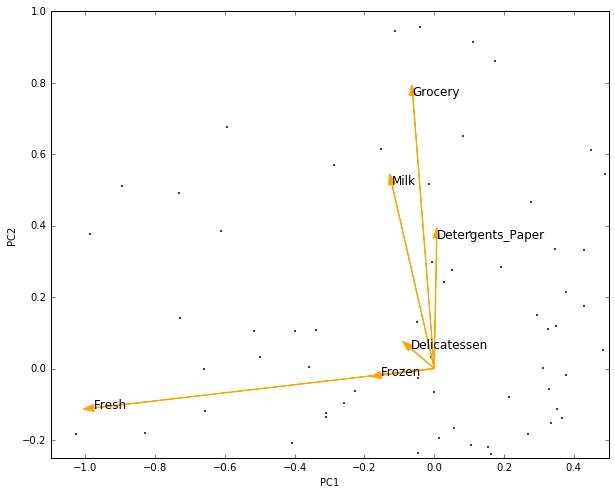

In [48]:
# Taken from another student (jjinking) in the discussion forums.

def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

ax = biplot(data)
# Play around with the ranges for scaling the plot
ax.set_xlim([-1.1, .5])
ax.set_ylim([-.25, 1])

###ICA

In [49]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6, whiten=True,random_state = 1).fit(data)

# Print the independent components
print ica.components_

[[  3.97596282e-06  -8.58804422e-07  -6.27469785e-07  -6.77279603e-07
    2.06698062e-06  -1.04227439e-06]
 [  2.10733777e-07  -1.87975348e-06   6.42278616e-06   4.11383263e-07
   -8.04988405e-07  -1.45823313e-06]
 [  1.53023680e-07   9.84836364e-06  -5.80431241e-06  -3.65167925e-07
    3.29363940e-06  -6.06103841e-06]
 [  3.86495528e-07   2.19445562e-07   6.00061772e-07   5.22125539e-07
   -5.08737108e-07  -1.80922704e-05]
 [ -2.99294418e-07   2.29931519e-06   1.20639216e-05  -1.46244818e-06
   -2.82088722e-05  -5.72776175e-06]
 [  8.65179584e-07   1.40470208e-07  -7.73705063e-07  -1.11461715e-05
    5.54595060e-07   5.95211374e-06]]


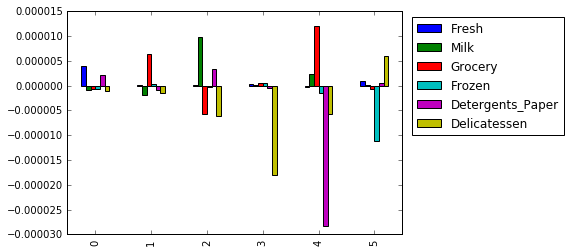

In [50]:
pd.DataFrame(ica.components_, columns = data.columns).plot(kind='bar').legend(bbox_to_anchor=(1.5, 1),loc=1)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

I will explain this vectors in terms the different type of customers based on their expenditure behavior: 

•	Vector 0: Customers that mainly consume Fresh and Detergents Paper in a correlated way.

•	Vector 1: Customers that mainly consume Grocery with a low negatively correlation with Milk.

•	Vector 2: Customers that consume a combination of Milk and Detergents Paper with a negative correlation with Grocery and Delicatessen.

•	Vector 3: Customer that almost exclusively consumes Delicatessen.

•	Vector 4: Customers that consume mainly Detergents Paper with some Delicatessen and a negative correlation with Grocery. 

•	Vector 5: Consumer that has expenditures of Frozen with negative correlation with Delicatessen.

The components can be used to transform the original data set into a data set based on independent vectors which will help clustering and classification algorithms to understand trends in data more easily. This is specifically important for algorithm that require independence in between features.

This vectors also give us insights related to have different expenditure patterns could show us how customers really are and help us understand/interpret the clustering results.



##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

•	K-Means is a hard assignment algorithm in comparison to GMM that is a soft assignment algorithm. This difference relies in the fact that in K-Means assigns an element to a particular cluster (the element only belongs to that cluster) while in GMM an element could belong different clusters with different probabilities. The soft assignment can cause confusion interpreting the results.

•	Both Clustering algorithms need the number of clusters as an input (which could be a challenging task on its own).

•	GMM considers a higher number of parameters than K-Means which makes GMM would be take longer to tune (determine the optimal configuration).

•	K-means is scalable on very large number of observations and on medium number of cluster while GMM is not scalable. In this sense, on big datasets K-means is recommended.

•	In each iteration, K-means needs to calculate the mean of each cluster while GMM needs to calculate the maximum likelihood gaussian distribution (which involves the mean and the standard deviation of more observations).  Considering this, we can say that GMM needs to perform more computations than K-means, therefore making it slower.**

•	GMM is the fastest algorithm for learning mixture models, but K-means is still the faster algorithm.


Under this distinctions, I would rather work with K-Means than GMM mainly because I would like to work around an algorithm that is easier to interpret (each customer belongs to one cluster and not to many), K-means is easier to tune and the size of the dataset will make speed irrelevant.

** Thanks to Mitchel and my codereviewerer (sorry I didn't catch your name) for helping me address the speed comparison.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [51]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [52]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


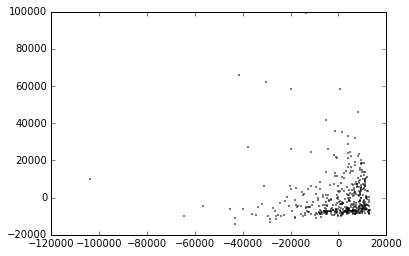

In [53]:
# Plot reduced_data to make a visual inspection of how many clusters there could be.
plt.figure(1)
plt.clf()
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.show()

In [54]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=3).fit(reduced_data)
#clusters = GMM(n_components=3).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [55]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [56]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.cluster_centers_
#centroids = clusters.means_
print centroids

[[  4106.90273941  -3168.41202086]
 [  1497.13461172  24998.27760147]
 [-24220.71188261  -4364.45560022]]


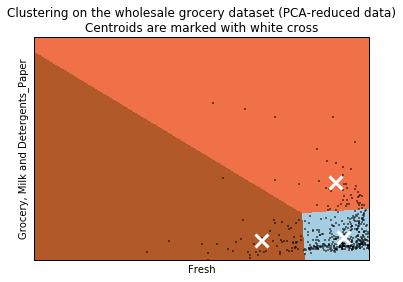

In [57]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(2)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.xlabel('Fresh')
plt.ylabel('Grocery, Milk and Detergents_Paper')
plt.show()

Legend


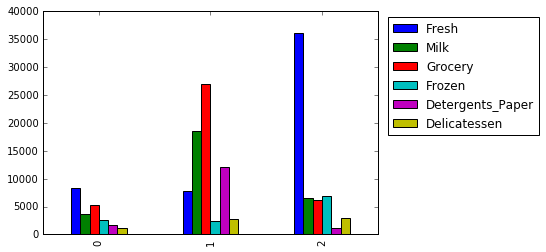

In [58]:
# Understand what the centroids really represent taking them to their original form
print pd.DataFrame(pca.inverse_transform(centroids), columns = data.columns).plot(kind='bar').legend(bbox_to_anchor=(1.5, 1),loc=1)

From this plot we can see that cluster 0 has spending’s mainly on Fresh and Grocery but has a lower spending in comparison with clusters 1 and 2. Cluster 1 has higher spending’s on Grocery, Milk and Detergents Paper while having about the same spending on Fresh than cluster 0. Cluster 2 is focused almost entirely on Fresh while having relatively similar spending on the rest of the product categories than cluster 0.

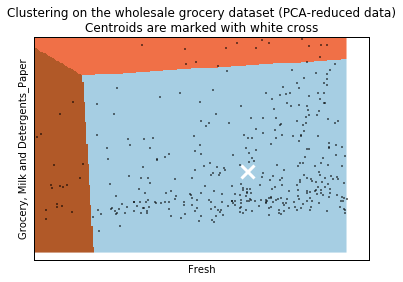

In [59]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(2)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(-15000, 15000)
plt.ylim(-15000, 15000)
plt.xticks(())
plt.yticks(())
plt.xlabel('Fresh')
plt.ylabel('Grocery, Milk and Detergents_Paper')
plt.show()

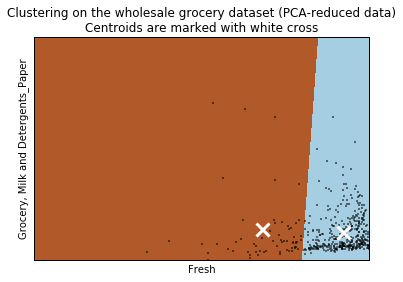

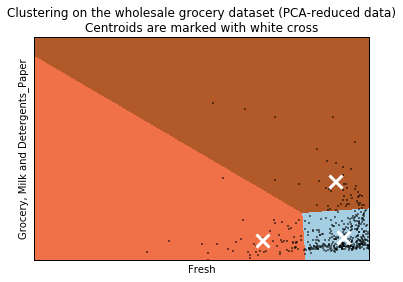

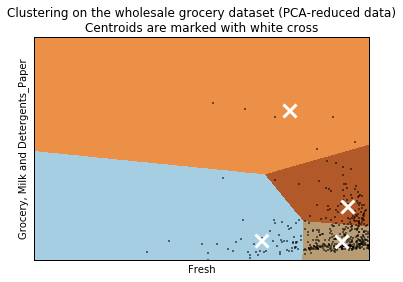

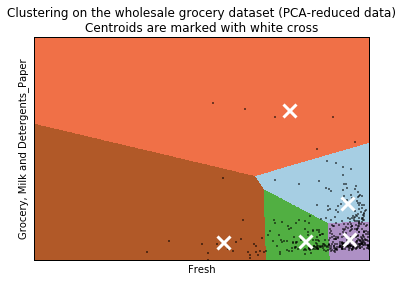

In [60]:
# I wanted to check the results for k = 2,3 and 4. Then I would asses the best
# number of clusters.
k=2
while k < 6:    
    clusters = KMeans(n_clusters=k).fit(reduced_data)
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    centroids = clusters.cluster_centers_
    plt.figure(2)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Fresh')
    plt.ylabel('Grocery, Milk and Detergents_Paper')
    plt.show()
    k += 1

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

The central objects, or centroids, represent how members of each cluster should be.

The centroid at the bottom right, which most of the customers are assigned to, is a customer which spends similars amount in Fresh vs Grocery + Milk + Detergents_Paper, the centroid to the bottom left has a higher spending on Fresh and the one at the top has a higher spending on Grocery + Milk + Detergents_Paper

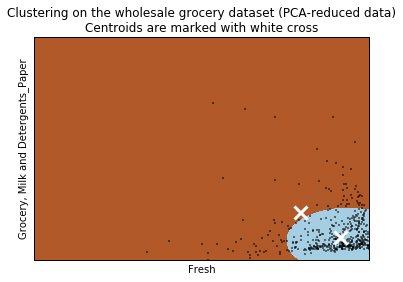

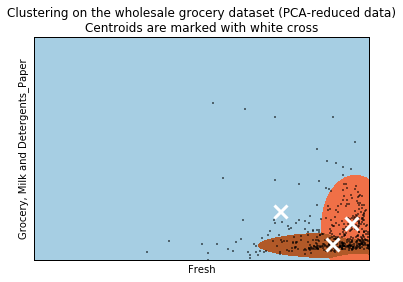

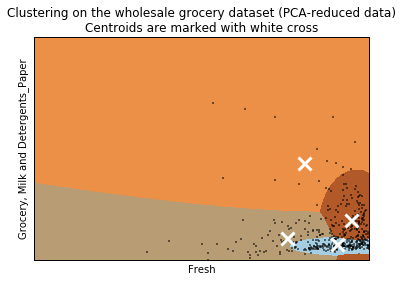

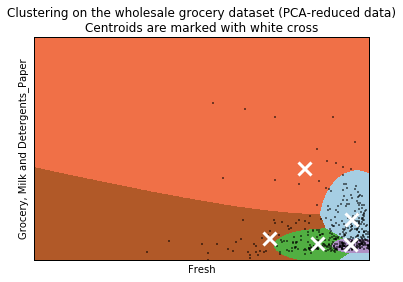

In [61]:
# I wanted to check the results for k = 2,3 and 4. Then I would asses the best
# number of clusters.
k=2
while k < 6:    
    clusters = GMM(n_components=k).fit(reduced_data)
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    centroids = clusters.means_
    plt.figure(2)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Fresh')
    plt.ylabel('Grocery, Milk and Detergents_Paper')
    plt.show()
    k += 1

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

The results for K-means show there are three customer segments, (1) one segment with high spending on Fresh and low spending on Grocery, Milk and Detergent (this segments has the highes amount of customers and should probably be analyzed more in depth), (2) one segment with the same levels of spending on Grocery, Milk and Detergent but with a lower amount of spending on Fresh and (3) a last segment with high spending on both Fresh and on Grocery, Milk and Detergent.

I would argue that segment (3) are customers of big supermarkets where they buy everything, (2) are segments of customers that go to local stores where they search for their day to day needs and (3) are small business customers (with low spendings).

After evaluating the results for GMM given 3 customer segments (cluster) I found that K-means gives more insights about this data mainly because the results on GMM showed clusters that overlapped a lot (mainly the one at the bottom right and top right) on GMM. This overlap resulted in some confusion about how the customers really are. Figure Nº7 shows the results for 3 clusters.


**9)** How would you use that technique to help the company design new experiments?

Answer: 

After determining the number of customer segments, I would focus an experiment to a determined customer segment and not to all customers and check the performance of the experiment. This way we can control the effects of a certain experiment to a particular group were we could choose to expand the experiments to other segments after good results or we choose to stop the experiment after bad results.

We could also design specific experiments customer segments, for example sending an email with a special offer associated with the spending to a subgroup and checking if their spending increased, remained the same o was lowered. 



**10)** How would you use that data to help you predict future customer needs?

Answer: 

Identifying the customer segments may not be enough for understanding customer needs. In this sense I would start conducting additional research on each customer segment separately. As mentioned before, I think the bottom right cluster needs additional research (based on the density and the amount of customers).

I would also try to find additional information (socio demographic and behavioral data) to analyze differences between customers and explore for further needs. Additional Supervised learning algorithms could be used to predict the probability of a customer to buy a certain product o to predict if the customer may churn the company.
